In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define file paths
file_paths = [
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/1_youth-mortality-rate.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/2_number-of-infant-deaths-unwpp.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/3_child-mortality-by-income-level-of-country.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/4_Distribution of Causes of Death among Children Aged less than 5 years.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/5_number-of-maternal-deaths-by-region.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/6_births-attended-by-health-staff-sdgs.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/7_global-vaccination-coverage.csv',
    '/Users/a/Documents/DataScience_World/Regonet/last_project//Infant_Mortality_Dataset/8_health-protection-coverage.csv'
]

# Validate file paths
def validate_paths(file_paths):
    """
    Validate that all file paths exist

    Args:
        file_paths (list): List of file paths

    Returns:
        bool: True if all paths are valid, False otherwise
    """
    valid_paths = all(os.path.exists(path) for path in file_paths)
    if not valid_paths:
        print("Error: One or more file paths are invalid!")
    return valid_paths

if not validate_paths(file_paths):
    raise FileNotFoundError("Invalid file paths! Please check the paths and try again.")

In [2]:
# Load datasets
def load_datasets(file_paths):
    """
    Load datasets from file paths

    Args:
        file_paths (list): List of file paths

    Returns:
        dict: Dictionary of loaded datasets
    """
    datasets = {}
    for i, path in enumerate(file_paths, 1):
        try:
            df = pd.read_csv(path, low_memory=False)
            dataset_name = f"data_{i}_{os.path.basename(path).split('.')[0]}"
            datasets[dataset_name] = df
            print(f"Loaded {dataset_name}: {len(df)} rows")
        except Exception as e:
            print(f"Error loading {path}: {e}")
    return datasets

datasets = load_datasets(file_paths)


Loaded data_1_1_youth-mortality-rate: 10515 rows
Loaded data_2_2_number-of-infant-deaths-unwpp: 18944 rows
Loaded data_3_3_child-mortality-by-income-level-of-country: 14200 rows
Loaded data_4_4_Distribution of Causes of Death among Children Aged less than 5 years: 146664 rows
Loaded data_5_5_number-of-maternal-deaths-by-region: 7056 rows
Loaded data_6_6_births-attended-by-health-staff-sdgs: 2985 rows
Loaded data_7_7_global-vaccination-coverage: 7897 rows
Loaded data_8_8_health-protection-coverage: 162 rows


In [3]:
def clean_dataset(df):
    """
    Comprehensive data cleaning method

    Args:
        df (pd.DataFrame): Input DataFrame

    Returns:
        pd.DataFrame: Cleaned DataFrame
    """
    # Standardize column names
    df.columns = (df.columns.str.strip()
                  .str.lower()
                  .str.replace(' ', '_')
                  .str.replace('-', '_')
                  .str.replace('[^a-z0-9_]', '', regex=True))

    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Advanced missing value handling
    for col in numeric_columns:
        # Interpolate for continuous numeric columns
        if df[col].notna().sum() > len(df) * 0.5:  # If more than 50% data is available
            df[col] = df[col].interpolate(method='linear')
        else:
            # Forward fill, then backward fill for sparse data
            df[col] = df[col].ffill().bfill()

    # Remove columns with all missing values
    df = df.dropna(axis=1, how='all')

    return df



In [4]:

# Clean all datasets
cleaned_datasets = {name: clean_dataset(df) for name, df in datasets.items()}


In [5]:

# Generate a report
def generate_comprehensive_report(cleaned_datasets):
    """
    Generate a comprehensive report of cleaned datasets

    Args:
        cleaned_datasets (dict): Dictionary of cleaned datasets
    """
    print("\n" + "="*80)
    print("INFANT MORTALITY DATASET - COMPREHENSIVE ANALYSIS REPORT")
    print("="*80 + "\n")

    for name, df in cleaned_datasets.items():
        print(f"DATASET: {name.upper()}")
        print("-"*40)

        # Basic Info
        print(f"Rows: {len(df)}, Columns: {len(df.columns)}")

        # Column Types
        print("\nColumn Types:")
        print(df.dtypes.value_counts())

        # Numeric Column Stats
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        if len(numeric_cols) > 0:
            print("\nNumeric Column Statistics:")
            print(df[numeric_cols].describe().T)

        # Quick Data Insights
        print("\nQuick Insights:")

        # Year range for datasets with year column
        if 'year' in df.columns:
            print(f"Year Range: {df['year'].min()} - {df['year'].max()}")

        # Unique entities/locations
        if 'entity' in df.columns:
            print(f"Total Unique Locations: {df['entity'].nunique()}")

        print("\n" + "="*40 + "\n")

generate_comprehensive_report(cleaned_datasets)


INFANT MORTALITY DATASET - COMPREHENSIVE ANALYSIS REPORT

DATASET: DATA_1_1_YOUTH-MORTALITY-RATE
----------------------------------------
Rows: 10515, Columns: 4

Column Types:
object     2
int64      1
float64    1
Name: count, dtype: int64

Numeric Column Statistics:
                                count         mean        std          min  \
year                          10515.0  1997.837565  16.457225  1950.000000   
under_fifteen_mortality_rate  10515.0     6.407323   6.958859     0.190339   

                                      25%          50%          75%  \
year                          1988.000000  2000.000000  2011.000000   
under_fifteen_mortality_rate     1.670638     3.532842     8.704788   

                                      max  
year                          2022.000000  
under_fifteen_mortality_rate    59.586483  

Quick Insights:
Year Range: 1950 - 2022
Total Unique Locations: 232


DATASET: DATA_2_2_NUMBER-OF-INFANT-DEATHS-UNWPP
-----------------------------

## Overview of Datasets

The analysis covers 8 different datasets focusing on various aspects of child and maternal health:
1. Youth Mortality Rate
2. Number of Infant Deaths
3. Child Mortality by Income Level
4. Distribution of Causes of Death (Children Under 5)
5. Maternal Deaths by Region
6. Births Attended by Health Staff
7. Global Vaccination Coverage
8. Health Protection Coverage

## Key Observations

### 1. Mortality Rates
- **Under-15 Mortality Rate** (1950-2022):
  - Mean: 6.41 deaths per 1,000
  - Wide variation: Ranges from 0.19 to 59.59
  - Median: 3.53 deaths per 1,000

### 2. Infant and Child Deaths
- **Number of Infant Deaths** (1950-2023):
  - Mean: 246,157 deaths per year
  - Significant variation (std dev: 1,198,653)
  - Maximum recorded: 13,514,505 deaths in a single year/location

### 3. Under-5 Mortality
- **Global Under-5 Mortality Rate** (1932-2022):
  - Mean: 8.01 deaths per 1,000
  - Range: 0.15 to 57.15
  - Median: 4.70 deaths per 1,000

### 4. Vaccination Coverage
Average vaccination rates for one-year-olds (1980-2021):
- BCG: 81.3%
- Hepatitis B3: 75.8%
- Hib3: 82.8%
- Polio3: 80.0%
- Measles: 78.0%
- DTP3: 79.5%

### 5. Health Coverage
- **Births Attended by Skilled Health Staff** (1980-2021):
  - Mean: 88.9%
  - Median: 98.7%
  - Suggesting significant improvement in medical care


## **Data Visualization**

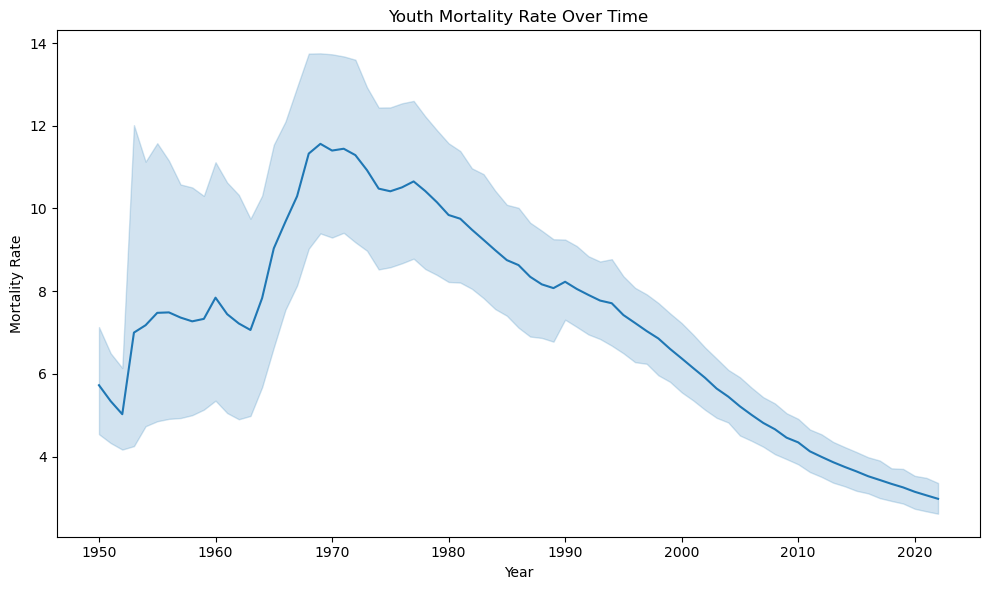

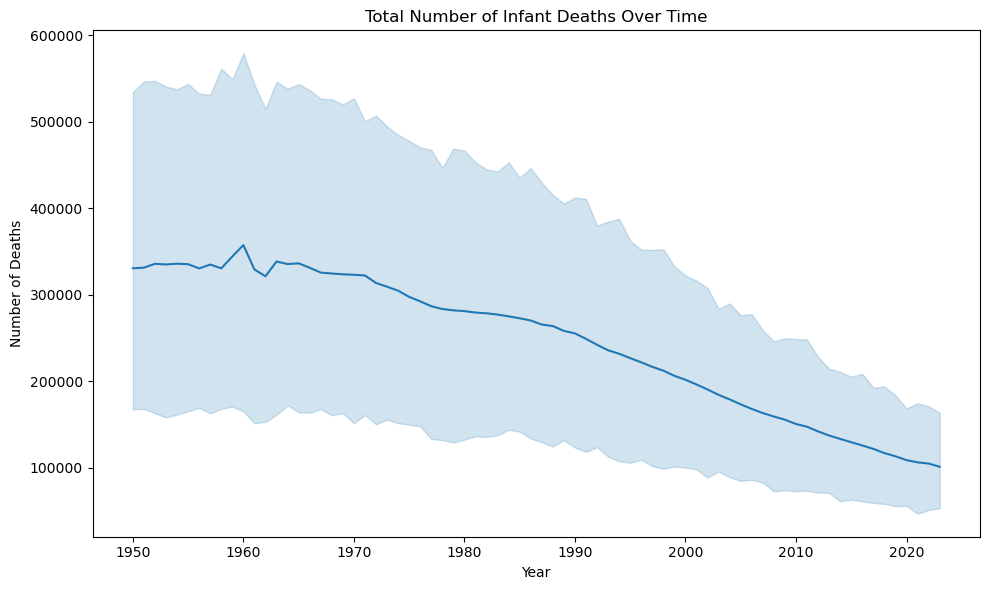

<Figure size 1500x800 with 0 Axes>

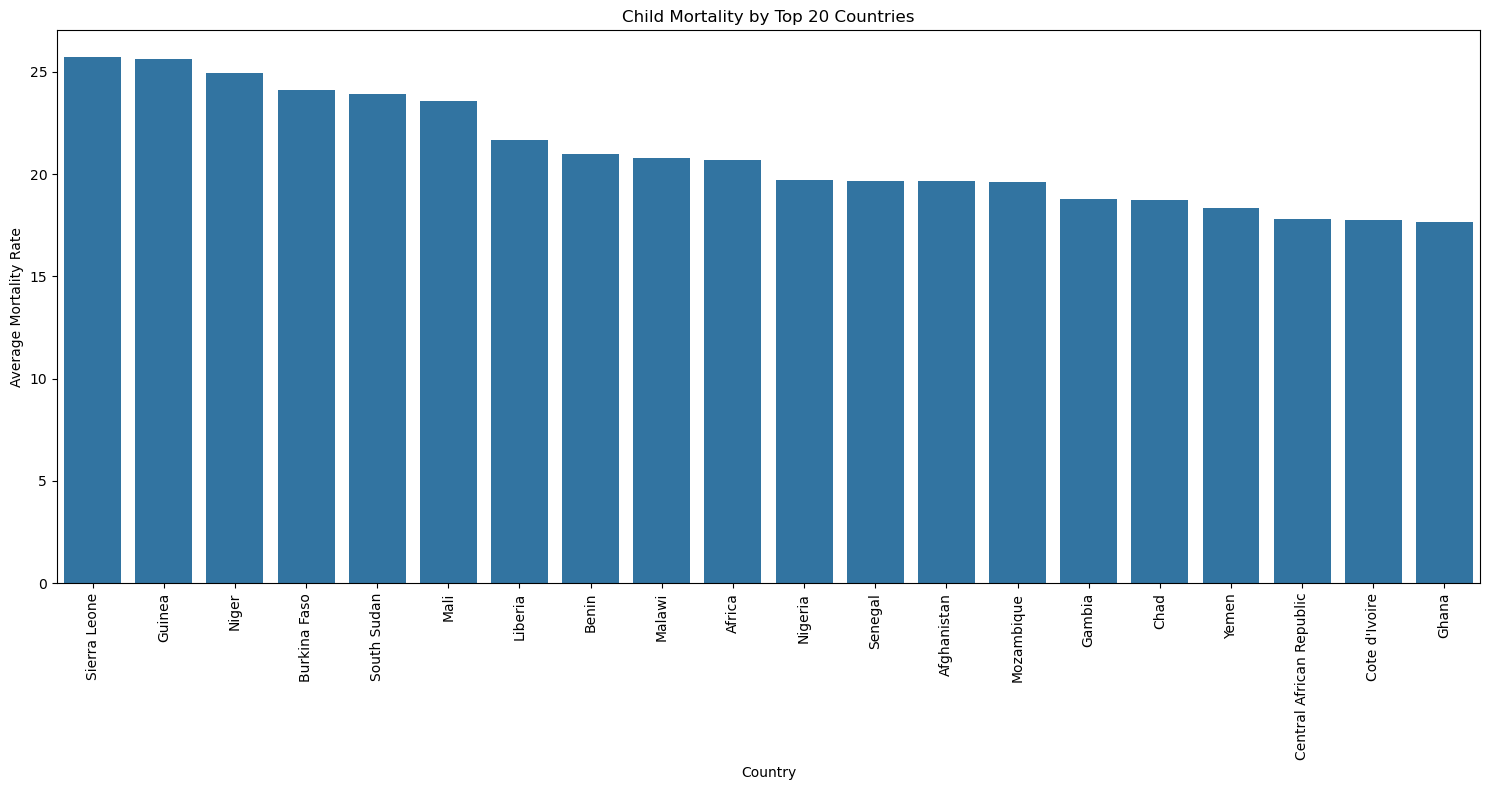

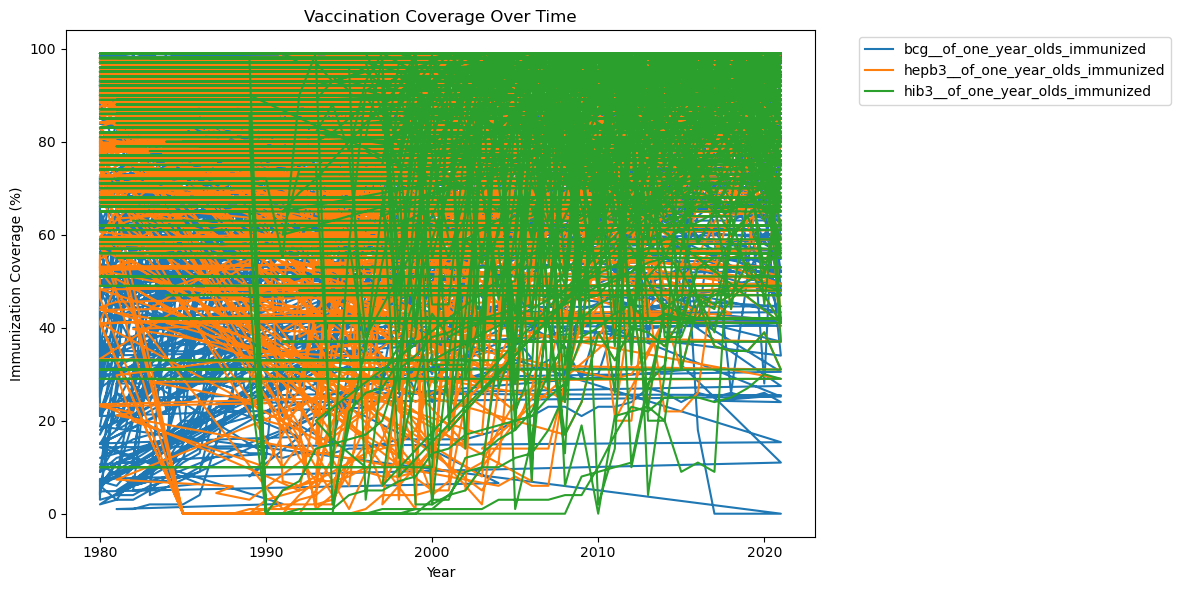

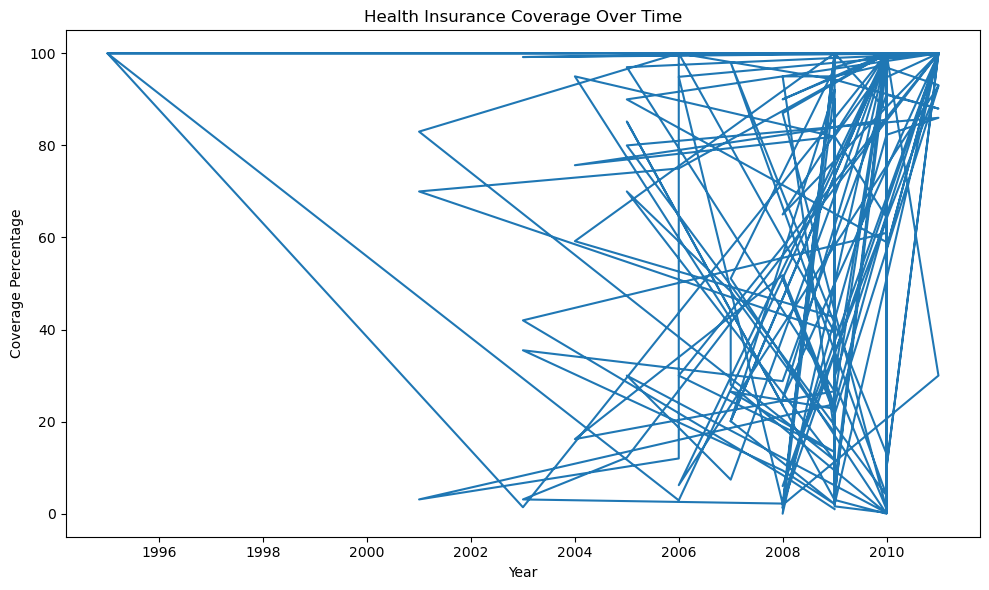

In [6]:

# 1. Youth Mortality Rate Trend
plt.figure(figsize=(10, 6))
mortality_data = cleaned_datasets['data_1_1_youth-mortality-rate']
try:
    sns.lineplot(data=mortality_data, x='year', y='under_fifteen_mortality_rate')
    plt.title('Youth Mortality Rate Over Time')
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in Mortality Rate Plot: {str(e)}")

# 2. Total Infant Deaths Trend
plt.figure(figsize=(10, 6))
infant_deaths_data = cleaned_datasets['data_2_2_number-of-infant-deaths-unwpp']
try:
    sns.lineplot(data=infant_deaths_data, x='year', 
                 y='deaths___sex_all___age_0___variant_estimates')
    plt.title('Total Number of Infant Deaths Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Deaths')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in Infant Deaths Plot: {str(e)}")

# 3. Child Mortality by Country
plt.figure(figsize=(15, 8))
child_mortality_data = cleaned_datasets['data_3_3_child-mortality-by-income-level-of-country']
try:
    # Find appropriate mortality column dynamically
    mortality_columns = [col for col in child_mortality_data.columns 
                         if 'mortality' in col.lower()]
    
    if mortality_columns:
        mortality_column = mortality_columns[0]
        
        # Aggregate data for boxplot
        plot_data = child_mortality_data.groupby('entity')[mortality_column].mean().reset_index()
        
        # Sort and select top 20 countries for readability
        plot_data = plot_data.nlargest(20, mortality_column)
        
        plt.figure(figsize=(15, 8))
        sns.barplot(x='entity', y=mortality_column, data=plot_data)
        plt.title('Child Mortality by Top 20 Countries')
        plt.xlabel('Country')
        plt.ylabel('Average Mortality Rate')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print("No mortality column found")
except Exception as e:
    print(f"Error in Child Mortality Plot: {str(e)}")

# 4. Vaccination Coverage
plt.figure(figsize=(12, 6))
vaccination_data = cleaned_datasets['data_7_7_global-vaccination-coverage']
try:
    # Find vaccination columns
    vacc_columns = [col for col in vaccination_data.columns 
                    if 'immunized' in col.lower()]
    
    plt.title('Vaccination Coverage Over Time')
    for column in vacc_columns[:3]:  # Limit to first 3 for clarity
        plt.plot(vaccination_data['year'], vaccination_data[column], label=column)
    
    plt.xlabel('Year')
    plt.ylabel('Immunization Coverage (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in Vaccination Coverage Plot: {str(e)}")

# 5. Health Coverage
plt.figure(figsize=(10, 6))
health_coverage_data = cleaned_datasets['data_8_8_health-protection-coverage']
try:
    # Identify numeric columns excluding 'year'
    numeric_columns = health_coverage_data.select_dtypes(include=[np.number]).columns
    coverage_column = [col for col in numeric_columns if col != 'year'][0]
    
    plt.plot(health_coverage_data['year'], health_coverage_data[coverage_column])
    plt.title('Health Insurance Coverage Over Time')
    plt.xlabel('Year')
    plt.ylabel('Coverage Percentage')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in Health Coverage Plot: {str(e)}")